# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Importing dataset

In [110]:
import seaborn as sns

df = yf.pdr_override()
stock =  'aapl' #input("Enter a stock symbol: ")
# print(stock)

df = yf.download(tickers=stock, period='5y', interval='1d')

print(df.head(10))
print('Shape of original dataframe:', df.shape)
print(df.info())
print('NaN values present:', df.isnull().values.any())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-05-30  38.355000  38.607498  38.332500  38.417500  36.368549   80507600
2017-05-31  38.492500  38.542500  38.095001  38.189999  36.153175   97804800
2017-06-01  38.292500  38.332500  38.055000  38.294998  36.252579   65616400
2017-06-02  38.395000  38.862499  38.222500  38.862499  36.789814  111082800
2017-06-05  38.584999  38.612499  38.365002  38.482498  36.430084  101326800
2017-06-06  38.474998  38.952499  38.445000  38.612499  36.553143  106499600
2017-06-07  38.755001  38.994999  38.619999  38.842499  36.770874   84278400
2017-06-08  38.812500  38.884998  38.599998  38.747501  36.680943   85003200
2017-06-09  38.797501  38.797501  36.505001  37.244999  35.258579  259530800
2017-06-12  36.435001  36.522499  35.627499  36.355000  34.416050  289229200
Shape o

# Creating dataframe



        Date       Open       High        Low      Close  Adj Close     Volume
0 2017-05-30  38.355000  38.607498  38.332500  38.417500  36.368549   80507600
1 2017-05-31  38.492500  38.542500  38.095001  38.189999  36.153175   97804800
2 2017-06-01  38.292500  38.332500  38.055000  38.294998  36.252579   65616400
3 2017-06-02  38.395000  38.862499  38.222500  38.862499  36.789814  111082800
4 2017-06-05  38.584999  38.612499  38.365002  38.482498  36.430084  101326800
5 2017-06-06  38.474998  38.952499  38.445000  38.612499  36.553143  106499600
6 2017-06-07  38.755001  38.994999  38.619999  38.842499  36.770874   84278400
7 2017-06-08  38.812500  38.884998  38.599998  38.747501  36.680943   85003200
8 2017-06-09  38.797501  38.797501  36.505001  37.244999  35.258579  259530800
9 2017-06-12  36.435001  36.522499  35.627499  36.355000  34.416050  289229200 

        Date      Open      High       Low     Close  Adj Close    Volume
0 2017-05-30  0.017903  0.018580  0.019722  0.019595 

<AxesSubplot:xlabel='Date', ylabel='Close'>

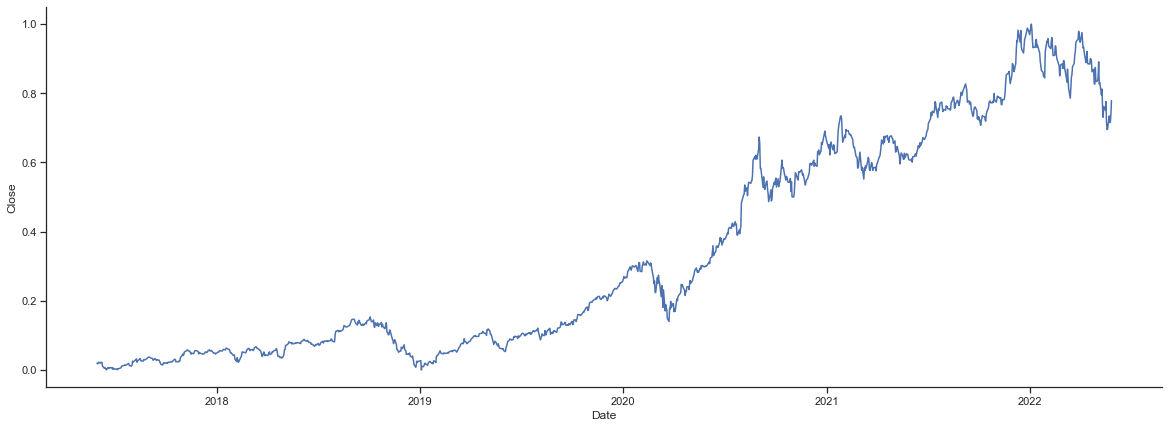

In [121]:
req= df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
req.reset_index(inplace=True)
print('\n')
print(req.head(10), '\n')

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(req[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

df_scaled['Date']= req['Date']
df_scalednew=df_scaled[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

print(df_scalednew.head(10), '\n')

fig, ax= plt.subplots(figsize= (20,7))
sns.lineplot(data=df_scalednew, x='Date', y='Close')

# Setting dependent and independent variables

In [4]:
#Set Target Variable
output_var = pd.DataFrame(df_scalednew['Close'])

#Selecting the Features
features1 = pd.DataFrame(df_scalednew[['Open']])
features2 = pd.DataFrame(df_scalednew[['Open', 'High']])
features3 = pd.DataFrame(df_scalednew[['Open', 'High', 'Low']])
features4 = pd.DataFrame(df_scalednew[['Open', 'High', 'Low', 'Volume']])
features5 = pd.DataFrame(df_scalednew[['Open', 'High', 'Low', 'Volume', 'Adj Close']])


print(output_var.head(10))
print(features2.head(10))

      Close
0  0.019595
1  0.018042
2  0.018759
3  0.022634
4  0.020039
5  0.020927
6  0.022497
7  0.021849
8  0.011590
9  0.005513
       Open      High
0  0.017903  0.018580
1  0.018839  0.018138
2  0.017477  0.016710
3  0.018175  0.020314
4  0.019468  0.018614
5  0.018720  0.020926
6  0.020626  0.021215
7  0.021017  0.020467
8  0.020915  0.019872
9  0.004833  0.004403


# Splitting in training and testing dataset

The sci-kit-learn library’s TimeSeriesSplit class will be used for this. We set the number of splits to 10, indicating that 10% of the data will be used as the test set and 90% of the data would be used to train the LSTM model. The advantage of utilising this Time Series split is that the split time series data samples are examined at regular time intervals rather than selecting the data randomly in case of tr

## For Open as feature

In [5]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(features1):
        x_train1, x_test1 = features1[:len(train_index)], features1[len(train_index): (len(train_index)+len(test_index))]
        y_train1, y_test1 = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## For Open and High as feature

In [6]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(features2):
        x_train2, x_test2 = features2[:len(train_index)], features2[len(train_index): (len(train_index)+len(test_index))]
        y_train2, y_test2 = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## For Open and High and Low as feature

In [7]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(features3):
        x_train3, x_test3 = features3[:len(train_index)], features3[len(train_index): (len(train_index)+len(test_index))]
        y_train3, y_test3 = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## For Open and High and Low and Volume as Feature

In [8]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(features4):
        x_train4, x_test4= features4[:len(train_index)], features4[len(train_index): (len(train_index)+len(test_index))]
        y_train4, y_test4 = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## For Open and High and Low and Volume and Adj Close as Feature

In [9]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(features5):
        x_train5, x_test5 = features5[:len(train_index)], features5[len(train_index): (len(train_index)+len(test_index))]
        y_train5, y_test5 = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [10]:
print('Shape of original dataframe', features1.shape)

print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

Shape of original dataframe (1260, 1)
(1146, 1)
(114, 1)
(1146,)
(114,)


# Reshaping the data

In [11]:
trainX1 =np.array(x_train1)
testX1 =np.array(x_test1)
print(trainX1.shape, '\n')
x_train1 = trainX1.reshape(x_train1.shape[0], 1, x_train1.shape[1])
x_test1 = testX1.reshape(x_test1.shape[0], 1, x_test1.shape[1])
print(x_train1.shape)


trainX2 =np.array(x_train2)
testX2 =np.array(x_test2)

x_train2 = trainX2.reshape(x_train2.shape[0], 1, x_train2.shape[1])
x_test2 = testX2.reshape(x_test2.shape[0], 1, x_test2.shape[1])



trainX3 =np.array(x_train3)
testX3 =np.array(x_test3)

x_train3 = trainX3.reshape(x_train3.shape[0], 1, x_train3.shape[1])
x_test3 = testX3.reshape(x_test3.shape[0], 1, x_test3.shape[1])



trainX4 =np.array(x_train4)
testX4 =np.array(x_test4)

x_train4 = trainX4.reshape(x_train4.shape[0], 1, x_train4.shape[1])
x_test4 = testX4.reshape(x_test4.shape[0], 1, x_test4.shape[1])




trainX5 =np.array(x_train5)
testX5 =np.array(x_test5)

x_train5 = trainX5.reshape(x_train5.shape[0], 1, x_train5.shape[1])
x_test5 = testX5.reshape(x_test5.shape[0], 1, x_test5.shape[1])




(1146, 1) 

(1146, 1, 1)


# Building the model

In [12]:
lstm1 = Sequential()
lstm1.add(LSTM(32, input_shape=(1, trainX1.shape[1]), activation='relu', return_sequences=False))
lstm1.add(Dense(1))
lstm1.compile(loss='mean_squared_error', optimizer='adam')
# plot_model(lstm, show_shapes=True, show_layer_names=True)

In [13]:
lstm2 = Sequential()
lstm2.add(LSTM(32, input_shape=(1, trainX2.shape[1]), activation='relu', return_sequences=False))
lstm2.add(Dense(1))
lstm2.compile(loss='mean_squared_error', optimizer='adam')
# plot_model(lstm, show_shapes=True, show_layer_names=True)

In [14]:
lstm3 = Sequential()
lstm3.add(LSTM(32, input_shape=(1, trainX3.shape[1]), activation='relu', return_sequences=False))
lstm3.add(Dense(1))
lstm3.compile(loss='mean_squared_error', optimizer='adam')
# plot_model(lstm, show_shapes=True, show_layer_names=True)

In [15]:
lstm4 = Sequential()
lstm4.add(LSTM(32, input_shape=(1, trainX4.shape[1]), activation='relu', return_sequences=False))
lstm4.add(Dense(1))
lstm4.compile(loss='mean_squared_error', optimizer='adam')
# plot_model(lstm, show_shapes=True, show_layer_names=True)

In [16]:
lstm5 = Sequential()
lstm5.add(LSTM(32, input_shape=(1, trainX5.shape[1]), activation='relu', return_sequences=False))
lstm5.add(Dense(1))
lstm5.compile(loss='mean_squared_error', optimizer='adam')
# plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training

In [17]:
lstm1.fit(x_train1, y_train1, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 2s 3ms/step - loss: 0.0279
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 3/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 5/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 6/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 7/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9/100
144/144 [==============================] - 0s 3ms/step - loss: 7.8888e-04
Epoch 10/100
144/144 [==============================] - 0s 3ms/step - loss: 6.4686e-04
Epoch 11/100
144/144 [==============================] - 0s 3ms/step - loss: 5.8988e-04
Epoch 12/100
144/144 [==============================] - 0s 3ms/step - loss: 5.6441e-

In [18]:
lstm2.fit(x_train2, y_train2, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 3s 3ms/step - loss: 0.0065
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 6/100
144/144 [==============================] - 0s 3ms/step - loss: 6.9867e-04
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 5.5246e-04
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 4.9102e-04
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 4.5962e-04
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 4.3644e-04
Epoch 11/100
144/144 [==============================] - 0s 2ms/step - loss: 4.1280e-04
Epoch 12/100
144/144 [==============================] - 0s 2ms/step - lo

In [19]:
lstm3.fit(x_train3, y_train3, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 3/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 5.4636e-04
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 3.8752e-04
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 3.0117e-04
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 2.4250e-04
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 2.0163e-04
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 1.7288e-04
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 1.5139e-04
Epoch 11/100
144/144 [==============================] - 0s 2ms/step - loss: 1.3389e-04
Epoch 12/100
144/144 [==============================] - 0s 2ms/s

In [20]:
lstm4.fit(x_train4, y_train4, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 6.1873e-04
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 3.6099e-04
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 2.6676e-04
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 2.1915e-04
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 1.8985e-04
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 1.7055e-04
Epoch 11/100
144/144 [==============================] - 0s 2ms/step - loss: 1.5647e-04
Epoch 12/100
144/144 [==============================] - 0s 2ms/step 

In [21]:
lstm5.fit(x_train5, y_train5, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 2s 2ms/step - loss: 0.0033
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 5.6132e-04
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 3.4057e-04
Epoch 6/100
144/144 [==============================] - 0s 3ms/step - loss: 2.6007e-04
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 2.1410e-04
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 1.8288e-04
Epoch 9/100
144/144 [==============================] - 0s 3ms/step - loss: 1.6044e-04
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 1.4439e-04
Epoch 11/100
144/144 [==============================] - 0s 3ms/step - loss: 1.3294e-04
Epoch 12/100
144/144 [==============================] - 0s 3ms/s

# Prediction

In [27]:
y_pred1= lstm1.predict(x_test1)
y_pred2= lstm2.predict(x_test2)
y_pred3= lstm3.predict(x_test3)
y_pred4= lstm4.predict(x_test4)
y_pred5= lstm5.predict(x_test5)

4/4 [==============================] - 0s 0s/step


# RMSE ans R2 score

## For Open as Feature

In [44]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

mse1=mse(y_test1, y_pred1)
r21=r2(y_test1, y_pred1)

print('RMSE error is', mse1)
print('R2 score is', r21)

RMSE error is 0.0004433702559031024
R2 score is 0.9143776771554681


## For Open and High as Feature

In [45]:
mse2=mse(y_test2, y_pred2)
r22=r2(y_test2, y_pred2)

print('RMSE error is', mse2)
print('R2 score is', r22)

RMSE error is 0.0002964132388068205
R2 score is 0.9427575718248958


## For Open and High and Low as Feature

In [116]:
mse3=mse(y_test3, y_pred3)
r23=r2(y_test3, y_pred3)

print('RMSE error is', mse3)
print('R2 score is', r23)

RMSE error is 0.0002811832440491219
R2 score is 0.9456987423493101


## For Open and High and Low and Volume as Feature

In [48]:
mse4=mse(y_test4, y_pred4)
r24=r2(y_test4, y_pred4)

print('RMSE error is', mse4)
print('R2 score is', r24)

RMSE error is 0.0002491621806069613
R2 score is 0.9518825532733994


## For Open and High and Low and Volume and Adj Close as Feature


In [129]:

mse5= mse(y_test5, y_pred5)
r25=r2(y_test5, y_pred5)

print('RMSE error is', mse5)
print('R2 score is', r25)

RMSE error is 0.00010896123981204453
R2 score is 0.9789577349212928


# Creating dataframe for comparison

In [85]:
matrix= {
    'IndVar': ['Open', 'OpenHigh', 'OpenHighLow', 'OpenHighLowVol', 'OpenHighLowVolAdj'],
    'RMSE': [mse1, mse2, mse3, mse4, mse5],
    'R2': [r21, r22, r23, r24, r25]
}

data=pd.DataFrame(matrix)

print(data)

              IndVar      RMSE        R2
0               Open  0.000443  0.914378
1           OpenHigh  0.000296  0.942758
2        OpenHighLow  0.000281  0.945699
3     OpenHighLowVol  0.000249  0.951883
4  OpenHighLowVolAdj  0.000109  0.978958


# Plotting RMSE

Text(0.5, 1.0, 'RMSE')

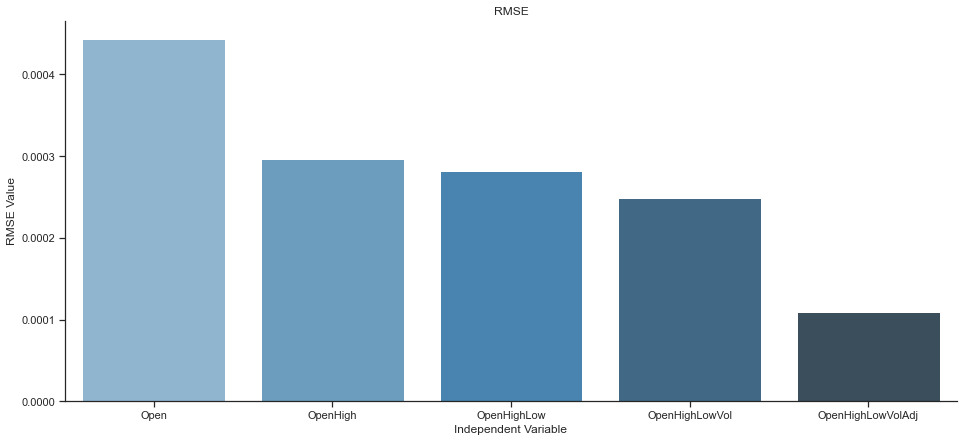

In [131]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
import seaborn as sns

sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(figsize=(16, 7))

sns.barplot(data=data, x='IndVar', y='RMSE', palette="Blues_d")
plt.xlabel('Independent Variable')
plt.ylabel('RMSE Value')
plt.title('RMSE')

Text(0.5, 1.0, 'RMSE')

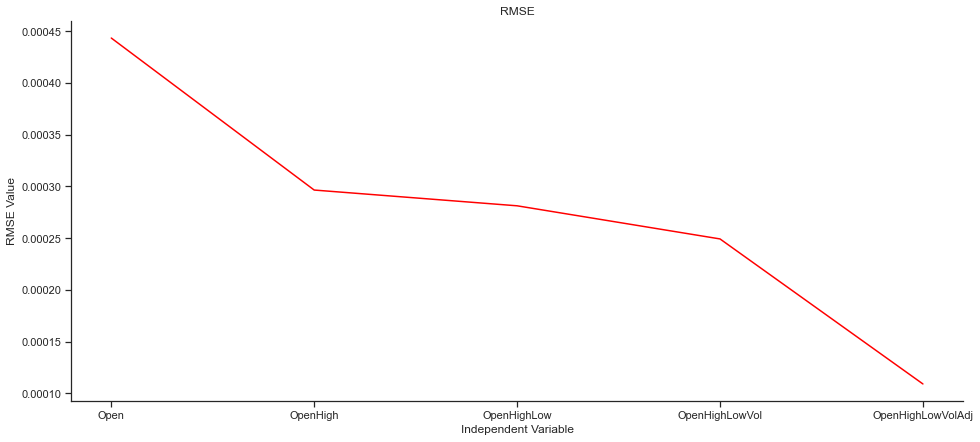

In [135]:
sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(figsize=(16, 7))

sns.lineplot(data=data, x='IndVar', y='RMSE', color='red')
plt.xlabel('Independent Variable')
plt.ylabel('RMSE Value')
plt.title('RMSE')

# Plotting R2 Score

Text(0.5, 1.0, 'R2 Scores')

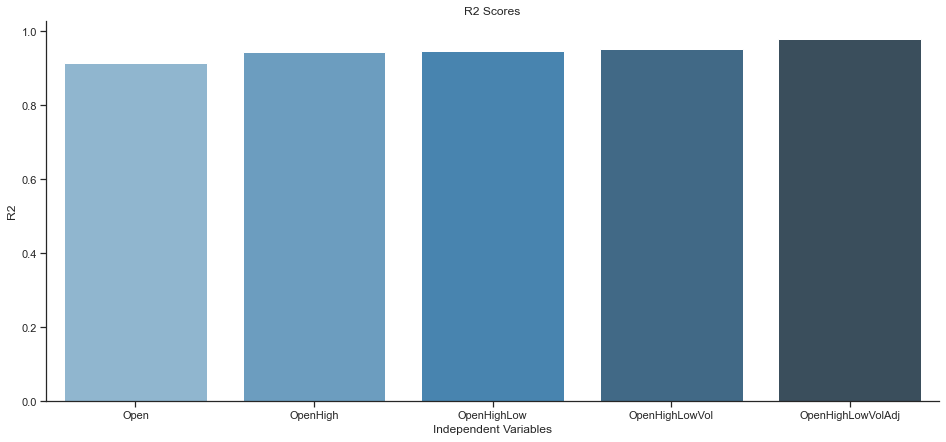

In [132]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
import seaborn as sns

sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(figsize=(16, 7))

sns.barplot(data=data, x='IndVar', y='R2', palette="Blues_d")
plt.xlabel('Independent Variables')
plt.ylabel('R2')
plt.title('R2 Scores')

Text(0.5, 1.0, 'R2 Scores')

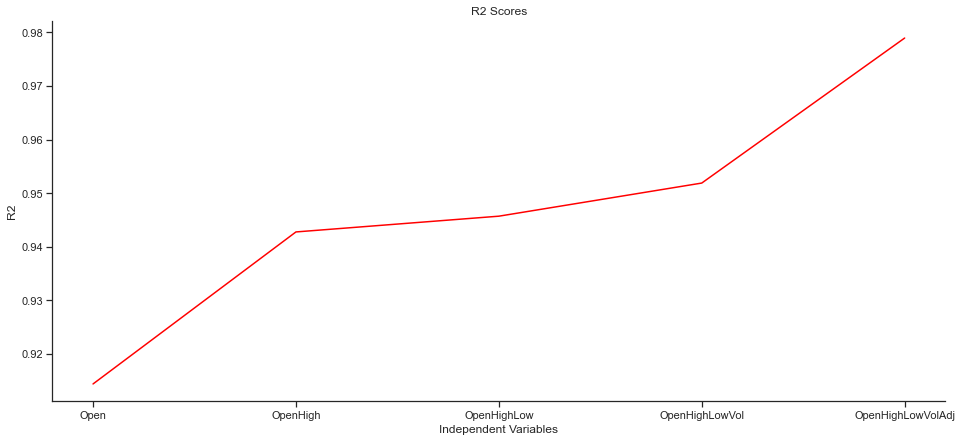

In [133]:
sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(figsize=(16, 7))

sns.lineplot(data=data, x='IndVar', y='R2', color= 'red')
plt.xlabel('Independent Variables')
plt.ylabel('R2')
plt.title('R2 Scores')

# Plotting

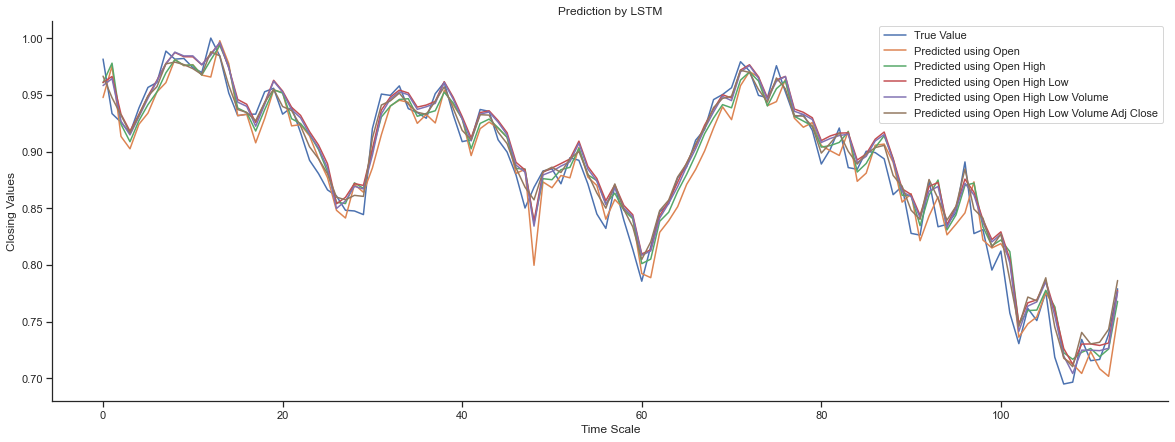

In [126]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
import seaborn as sns

sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(20, 7))

plt.plot(y_test1, label='True Value')
plt.plot(y_pred1, label='Predicted using Open')
plt.plot(y_pred2, label='Predicted using Open High')
plt.plot(y_pred3, label='Predicted using Open High Low')
plt.plot(y_pred4, label='Predicted using Open High Low Volume')
plt.plot(y_pred5, label='Predicted using Open High Low Volume Adj Close')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Closing Values')
plt.legend()
plt.show()

# Plotting Training Loss and Validation Loss

Plotting only for Open, High, Low, Volume, Adj Close as this feature selection has lowest RMSE and highest R2 score.

Epoch 1/100
1031/1031 [==============================] - 3s 3ms/step - loss: 7.6984e-06 - val_loss: 3.0883e-06
Epoch 2/100
1031/1031 [==============================] - 3s 2ms/step - loss: 7.3040e-06 - val_loss: 3.5198e-06
Epoch 3/100
1031/1031 [==============================] - 2s 2ms/step - loss: 6.4442e-06 - val_loss: 3.2505e-06
Epoch 4/100
1031/1031 [==============================] - 2s 2ms/step - loss: 7.7680e-06 - val_loss: 2.7728e-06
Epoch 5/100
1031/1031 [==============================] - 3s 3ms/step - loss: 9.3029e-06 - val_loss: 3.6415e-06
Epoch 6/100
1031/1031 [==============================] - 4s 4ms/step - loss: 7.3160e-06 - val_loss: 5.6165e-06
Epoch 7/100
1031/1031 [==============================] - 3s 3ms/step - loss: 7.6908e-06 - val_loss: 8.1492e-06
Epoch 8/100
1031/1031 [==============================] - 2s 2ms/step - loss: 8.9489e-06 - val_loss: 6.0634e-06
Epoch 9/100
1031/1031 [==============================] - 3s 3ms/step - loss: 7.2690e-06 - val_loss: 1.8834e-04
E

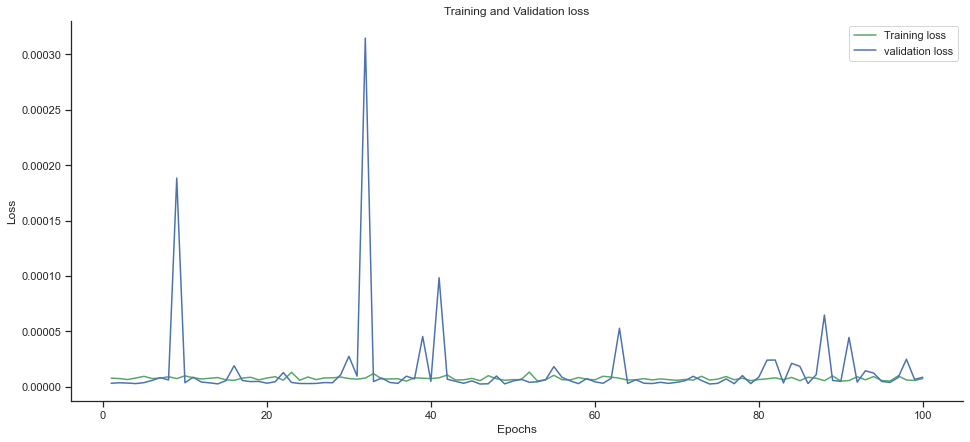

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train5, y_train5, test_size=0.10, random_state=1)
history = lstm5.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_val, y_val))

# adding custom params
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(figsize=(16, 7))

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion

From the above barplots and lineplots we can make an inference that when the features Open, High, Low, Volume, Adj Close are included RMSE value is lowest indicating there is very less distance between predicted values by the model and actual values from the dataset.

Also, the R2 score which shows variation in the output dependent attribute which is predictable from the input independent variable(s). This is  highest i.e. closest to 1 when Open, High, Low, Volume, Adj Close feature is included indicating goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

Hence, when more features are included as features to train the model RMSE value decreases and R2 score increases.